In [1]:
# K-fold 교차검증
from sklearn import datasets
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
digits = datasets.load_digits()
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

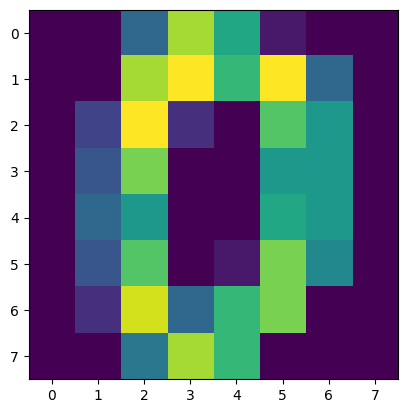

In [3]:
import matplotlib.pyplot as plt
plt.imshow(digits.data[0].reshape(8,8))
plt.show()

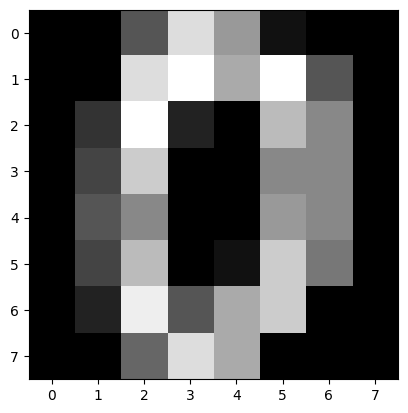

In [11]:
import matplotlib.pyplot as plt
plt.imshow(digits.data[0].reshape(8,8), cmap='gray')
plt.show()

In [4]:
features = digits.data
target = digits.target
standardizer = StandardScaler()
logit = LogisticRegression()
pipeline = make_pipeline(standardizer, logit)   # 스케일링, 분류

In [5]:
# k-fold 교차검증
kf = KFold(n_splits = 10, shuffle = True, random_state=1)   # 10덩어리

# k-fold 교차검증 수행
cv_results = cross_val_score(pipeline,  # 파이프라인
                             features,  # 특성행렬
                             target,    # 타깃 벡터
                             cv =kf,    # 교차검증기법
                             scoring = 'accuracy',
                             n_jobs=-1)

print(len(cv_results))

10


In [7]:
print(cv_results.mean())

0.9693916821849783


In [12]:
# 2. ShuffleSplit : 반복횟수에 관계없이 학습용, 검증용 데이터셋을 임의로 지정할 수 있음
# 반복마다 랜덤하게 분할하므로 하나의 샘플이 여러번 포함될 수 있음

from sklearn.model_selection import ShuffleSplit
# ShuffleSplit 분할기(학습용 50%, 검증용 20%)
ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.2, random_state=42)
pipeline=make_pipeline(standardizer, logit)
# 교차검증을 수행
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=ss, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용
# 평균을 계산
cv_results.mean()

0.9630555555555554

In [13]:
# 3. RepeatedKFold 교차검증

from sklearn.model_selection import RepeatedKFold
# RepeatedKFold 분할기(10회 교차검증을 5회 반복)
rk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)
# 교차검증을 수행
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=rk, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용
# 검증 점수 개수를 확인
print(len(cv_results))

# 평균을 계산
print(cv_results.mean())

50
0.9695065176908755


In [8]:
# 4.hyperparameter 값 영향 시각화
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

# 데이터로드
digits = load_digits()

# 특성행렬과 타깃벡터
features, target = digits.data, digits.target

# 파라미터 값 범위
param_range = np.arange(1,250,2)

train_scores, test_scores = validation_curve(   # 파라미터 하나만 테스트할 때 사용가능
    RandomForestClassifier(),
    features,
    target,
    param_name = 'n_estimators',   # 분류기수
    param_range=param_range,      # 조합해서 테스트
    cv=3,
    scoring ='accuracy',
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)


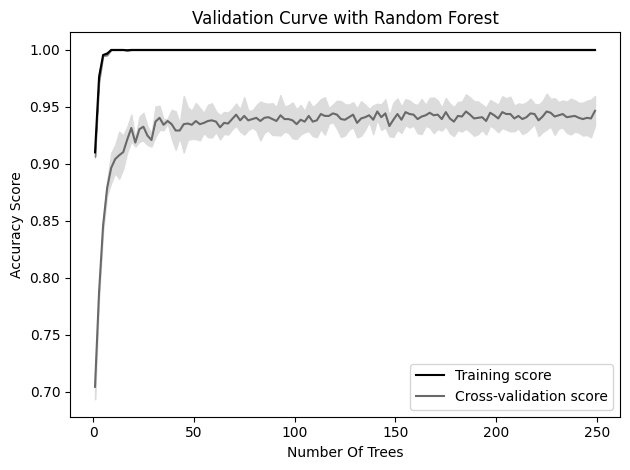

In [14]:
# 평균정확도

plt.plot(param_range, train_mean, label='Training score', color = 'black')
plt.plot(param_range, test_mean, label="Cross-validation score", color = 'dimgrey')

# 평균에서 표준편차 +- 범위내에서 상한/하한 결정
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color = 'gray')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color = 'gainsboro')

plt.title("Validation Curve with Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()